In [1]:
import sys
print(sys.executable)


/home/student/msc-74/vs/venv/bin/python


In [2]:
!pip install nltk



In [4]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv('/home/student/msc-74/covid19_tweets.csv')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    return pd.Series([scores['neg'], scores['neu'], scores['pos'], scores['compound']])

# Add sentiment columns to DataFrame
df[['neg', 'neu', 'pos', 'compound']] = df['text'].apply(analyze_sentiment)

# Optional: Add overall sentiment label
def get_sentiment_label(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['compound'].apply(get_sentiment_label)

# Display the result
print(df)





[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                     user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Br

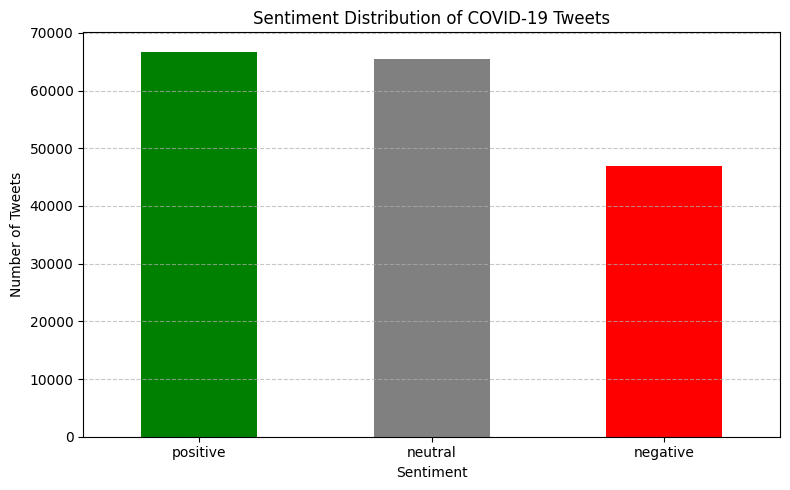

In [8]:
import matplotlib.pyplot as plt
# Count each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution of COVID-19 Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


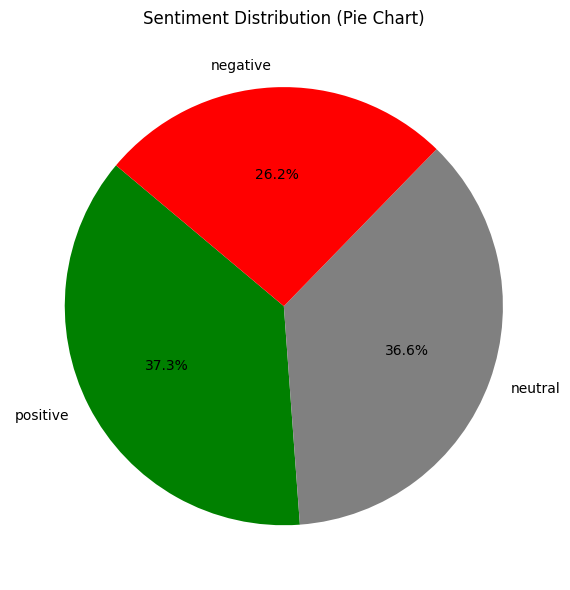

In [9]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
        startangle=140, colors=['green', 'gray', 'red'])
plt.title('Sentiment Distribution (Pie Chart)')
plt.tight_layout()
plt.show()
